In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import LabelEncoder

In [93]:
df=pd.read_csv("loan_approval_data.csv")
df.drop(columns="ApplicantID",inplace=True)
df

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,3+,Graduate,Yes,11435,3655,699,180,1,Urban,0
1,Female,No,2,Not Graduate,Yes,6998,7938,164,300,1,Urban,1
2,Male,Yes,1,Graduate,No,2162,9101,283,240,1,Rural,0
3,Male,Yes,0,Graduate,Yes,3974,187,589,180,1,Urban,0
4,Male,No,3+,Graduate,Yes,21675,5409,60,360,0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Male,No,3+,Not Graduate,No,10605,4733,220,300,1,Urban,1
796,Male,No,3+,Not Graduate,No,4014,7081,208,120,0,Semiurban,0
797,Male,Yes,2,Graduate,No,3381,8690,250,360,1,Rural,1
798,Male,No,2,Graduate,No,3098,7117,536,120,1,Rural,0


In [94]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,3,0,1,11435,3655,699,180,1,2,0
1,0,0,2,1,1,6998,7938,164,300,1,2,1
2,1,1,1,0,0,2162,9101,283,240,1,0,0
3,1,1,0,0,1,3974,187,589,180,1,2,0
4,1,0,3,0,1,21675,5409,60,360,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,0,3,1,0,10605,4733,220,300,1,2,1
796,1,0,3,1,0,4014,7081,208,120,0,1,0
797,1,1,2,0,0,3381,8690,250,360,1,0,1
798,1,0,2,0,0,3098,7117,536,120,1,0,0


In [95]:
x=df.drop(columns="Loan_Status")
y=df["Loan_Status"]
y

0      0
1      1
2      0
3      0
4      0
      ..
795    1
796    0
797    1
798    0
799    1
Name: Loan_Status, Length: 800, dtype: int64

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [97]:
model=SVC(kernel="rbf")
model.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [98]:
pre=model.predict(x_test)
pre

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1])

In [99]:
accuracy=accuracy_score(y_test,pre)
print(f"accuracy:{accuracy*100:.2f}%")

accuracy:70.00%


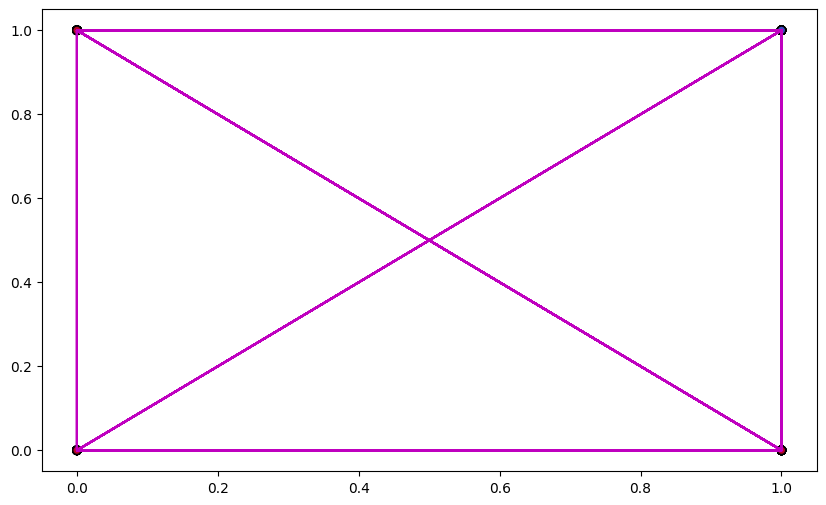

In [100]:
plt.figure(figsize=[10,6])
plt.scatter(x_test["Gender"],x_test["Education"],c=pre,cmap="coolwarm",edgecolors="k")
plt.plot(x_test["Gender"],pre,color="m")
plt.show()

In [101]:
new_data=pd.DataFrame({
    "Gender":label.fit_transform(["Male"]),
    "Married":label.fit_transform(["No"]),
    "Dependents":[3],
    "Education":label.fit_transform(["Graduate"]),
    "SelfEmployed":label.fit_transform(["No"]),
    "ApplicantIncome":[111],
    "CoapplicantIncome":[1110],
    "LoanAmount":[10],
    "Loan_Amount_Term":[110],
    "Credit_History":[1],
    "Property_Area":label.fit_transform(["Urban"])})
p=model.predict(new_data)
p

array([0])